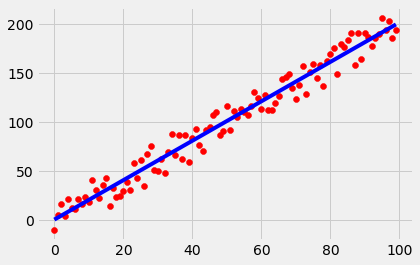

In [2]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style
import random
%matplotlib inline
style.use('fivethirtyeight')


# create dataset
# determaine how much point you need
# determine the variance 
# determine the correlation 

def create_dataset(how_much, variance, step=2, correlation=False):
    val = 1
    ys = []
    for _ in range(how_much):
        y = val+random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(ys, dtype = np.float64) , np.array(xs, dtype = np.float64)

y_axis , x_axis = create_dataset(100 , 20 , 2 , correlation='pos')
#================ custom Linear Regression ALgorithm ================
# draw the best fit line
def bfl(x,y):
    m = (mean(x)*mean(y) - mean(x*y)) / ( (mean(x)**2 - mean(x*x)))
    b = mean(y) - m*mean(x)
    return m,b

m,b = bfl(x_axis , y_axis)
regression_line = [(m*x) + b for x in x_axis]

plt.scatter(x_axis , y_axis , color='r')
plt.plot(x_axis , regression_line , color ='b')
plt.show()
        

In [3]:
#=========== sklearn Linear Regression Algorithm ============

from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_axis.reshape(len(x_axis),-1) , y_axis.reshape(len(y_axis),-1))

In [4]:
example = np.array([40])
example = example.reshape(len(example),-1)
LR.predict(example)

array([[81.00576658]])

### plot both custom line Regression Line and sklearn RL

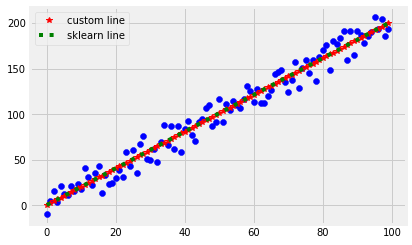

In [5]:
# get slop and intercept 
m = LR.coef_[0][0]
b = LR.intercept_[0]
# get label from input y = h(x) , h = mx+b
RL = [m * x + b for x in x_axis]
plt.scatter(x_axis , y_axis , color='b')
plt.plot(x_axis , regression_line , 'r*', label="custom line")
plt.plot(x_axis , RL , 'g:', label="sklearn line")
plt.legend()
plt.show()